In [1]:
from datetime import date, timedelta
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

In [2]:
df_train = pd.read_csv(
    'D:/data mining/infor project/train.csv', usecols=[1, 2, 3, 4, 5],
    dtype={'onpromotion': bool},
    parse_dates=["date"],
    skiprows=range(1, 66458909)  # 2016-01-01
)

In [3]:
df_2017 = df_train.loc[df_train.date>=pd.datetime(2017,1,1)]
del df_train
df_2017 = df_2017.set_index(
    ["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(
        level=-1).fillna(0)
df_2017.columns = df_2017.columns.get_level_values(1)

In [4]:
## read in the predicted cross validation period sales of the model for which the plots are to be made
df_pred_final_nn = pd.read_csv('nn_cv.csv',parse_dates=["date"])
df_pred_final_nn.set_index(["store_nbr", "item_nbr", "date"], inplace=True)

In [5]:
graph_act = df_2017[pd.date_range("2017-06-06", periods=66)].stack().to_frame("unit_sales")

In [6]:
graph = graph_act.join(df_pred_final_nn, how = 'left', lsuffix = 'actual',rsuffix='pred').reset_index()

In [7]:
graph_trial = graph.loc[(graph['store_nbr']== 54) & (graph['item_nbr']==2053614),:]

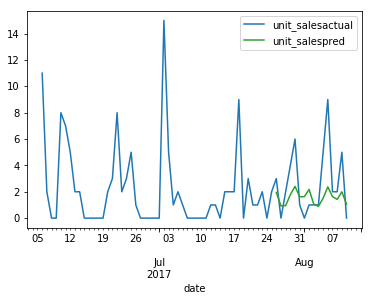

In [8]:
ax = graph_trial.plot(x="date", y="unit_salesactual", kind="line")
graph_trial.plot(x="date", y="unit_salespred", kind="line", ax=ax, color="C2")

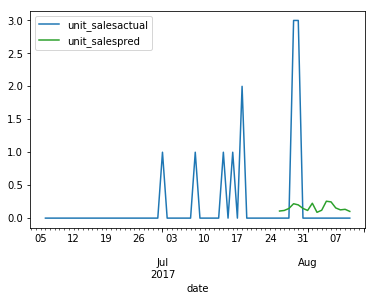

In [9]:
graph_trial = graph.loc[(graph['store_nbr']== 54) & (graph['item_nbr']==270522),:]
ax = graph_trial.plot(x="date", y="unit_salesactual", kind="line")
graph_trial.plot(x="date", y="unit_salespred", kind="line", ax=ax, color="C2")

In [10]:
graph['unit_salespred'] = [np.log1p(float(u)) if float(u) > 0 else 0 for u in graph['unit_salespred']]
graph['unit_salesactual'] = [np.log1p(float(u)) if float(u) > 0 else 0 for u in graph['unit_salesactual']]
graph['errors'] = (graph['unit_salespred'] - graph['unit_salesactual'])

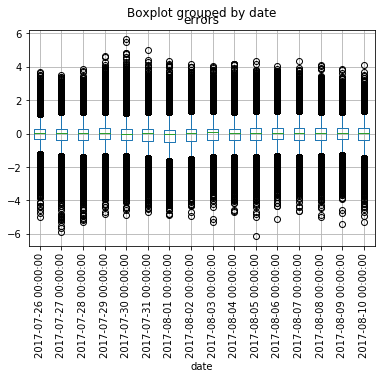

In [11]:
graph.loc[graph['date'] >= "2017-07-26",:].boxplot(by="date", column="errors",rot=90)